# Step 1 - Download the Dataset
Download the Dataset from the following link:
https://www.kaggle.com/felixzhao/productdemandforecasting

# Step 2 - Read the Dataset
Read the dataset into a Pandas Dataframe.
Does the dataset include any missing values? If so, drop them.
Hint: Pandas can do that with one line of code!

In [ ]:
import pandas as pd 
df = pd.read_csv("Historical Product Demand.csv")
df.dropna(inplace=True)

In [16]:
# Keep the first 100 rows and drop the rest - TESTING ONLY
#df = df.head(5000)

# Step 3 - Extract Features
Exclude the region and date from the considered features.
Hint: You can choose to use all the features.

In [17]:
# Description of the data
df.describe()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1037336,1037336,1037336,1037336,1037336
unique,2160,4,33,1729,3749
top,Product_1359,Whse_J,Category_019,2013/9/27,1000
freq,16936,764447,470266,2075,112263


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1037336 non-null  object
 1   Warehouse         1037336 non-null  object
 2   Product_Category  1037336 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1037336 non-null  object
dtypes: object(5)
memory usage: 47.5+ MB


# Step 4 - Perform Preprocessing
Perform any needed pre-processing on the chosen features including:
Scaling.
Encoding.
Dealing with Nan values.
Hint:
Use only the preprocessing steps you think are useful.

In [19]:
# finding the percentage of missing value
print("Number of attributes with null vaules: ", df.isnull().any().sum())
print("Percentage of missing values: ",df.isnull().any(axis=1).sum()/len(df)*100)

Number of attributes with null vaules:  0
Percentage of missing values:  0.0


In [20]:
#encode the column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Product_Code"] = label_encoder.fit_transform(df['Product_Code'])
df = pd.get_dummies(df, columns=['Warehouse', 'Product_Category'])

# Drop rows with data we don't want from the feature matrix
df.drop('Date', axis=1, inplace=True)

In [21]:
# Check if all values in the DataFrame are numbers
all_numeric = pd.to_numeric(df.stack(), errors='coerce').notnull().all()

if all_numeric:
    print("All values in the DataFrame are numbers.")
else:
    print("Some values in the DataFrame are not numbers.")

    # Convert each column to numeric format
    numeric_df = df.apply(pd.to_numeric, errors='coerce')

    # Find rows with non-numeric values
    non_numeric_rows = df[numeric_df.isna().any(axis=1)]

    print("Rows with non-numeric values:")
    print(non_numeric_rows)

Some values in the DataFrame are not numbers.
Rows with non-numeric values:
         Product_Code Order_Demand  Warehouse_Whse_A  Warehouse_Whse_C  \
112290           2156          (1)                 1                 0   
112307           2119         (24)                 1                 0   
112308           2131         (24)                 1                 0   
112356           2105         (50)                 1                 0   
112357           2107        (100)                 1                 0   
...               ...          ...               ...               ...   
1047812          1875        (100)                 0                 0   
1047840            91        (400)                 0                 0   
1047855           685        (230)                 0                 0   
1047856           686        (230)                 0                 0   
1047857           687        (270)                 0                 0   

         Warehouse_Whse_J  Warehous

In [22]:
# Convert each column to numeric format
df = df.apply(pd.to_numeric, errors='coerce')

# Find rows with non-numeric values
non_numeric_rows = df.isna().any(axis=1)

# Drop rows with non-numeric values in place
df.drop(df[non_numeric_rows].index, inplace=True)

print("DataFrame with non-numeric rows dropped in place:")

DataFrame with non-numeric rows dropped in place:


In [23]:
#pull only 'order demand'
y = df["Order_Demand"]

#drop 'order demand'
df.drop('Order_Demand', axis=1, inplace=True)

#pull all columns
X = df.values

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 5 - Split the Data
Split your data as follows:
80% training set
10% validation set
10% test set

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.2)
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size = 0.5)

# Step 6 - Training K-Nearest Neighbor (KNN) Regression
Use a KNN regressor model to train your data.
Choose the best k for the KNN algorithm by trying different values and validating performance on the validation set.
Regression Metrics
Print the R-squared score of your final KNN regressor.

In [26]:
import time
from sklearn.neighbors import KNeighborsRegressor 

scores = []
best_score = 0
neighbours = range(1,10)
best_k = 0
start_time = time.time()

for i in neighbours:
    
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)

    score = model.score(X_test, y_test)
    scores.append(round(score,3))
    y_pred = model.predict(X_test)

    # Calculate the elapsed time
    elapsed_time = time.time() - start_time
    print(f"K: {i}, score: {round(score,3)}, best: {round(best_score,3)}, time: {elapsed_time}")

    if score > best_score:
        best_score = score
        best_k = i
        best_knn = model

print(scores)
print("Best score: ", best_score)
print("Best k:", best_k)

K: 1, score: -0.01717426389163701, best: 0
K: 2, score: 0.1323922232056347, best: 0
K: 3, score: 0.1294302261308261, best: 0.1323922232056347
K: 4, score: 0.14239918579751587, best: 0.1323922232056347
K: 5, score: 0.17562947955292452, best: 0.14239918579751587
K: 6, score: 0.11246956590288104, best: 0.17562947955292452
K: 7, score: 0.1508828002077982, best: 0.17562947955292452
K: 8, score: 0.15264348801330319, best: 0.17562947955292452
K: 9, score: 0.1680030200564424, best: 0.17562947955292452
[-0.017, 0.132, 0.129, 0.142, 0.176, 0.112, 0.151, 0.153, 0.168]
Best score:  0.17562947955292452
Best k: 5


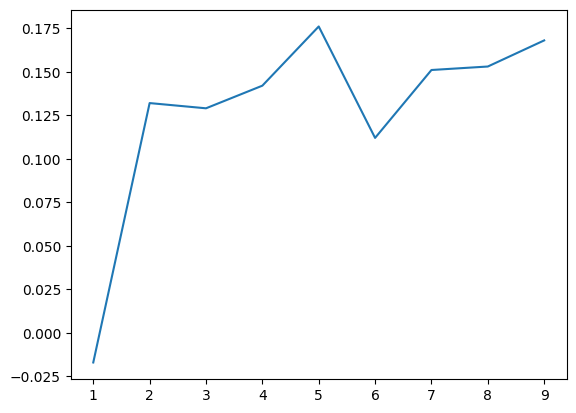

In [27]:
import matplotlib.pyplot as plt
plt.plot(neighbours, scores)

# Step 7 - Challenge Yourself (Optional)
Repeat step 6 for a different regression modelling technique.